Load deformation_level_0/1.dat.bz2 file to visulize deformation detected by NRR and thus visulize the artifact generated by low start level and small lambda value

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import struct
import bz2
import pathlib

In [53]:
nframe = 3
dirname = pathlib.Path().absolute()

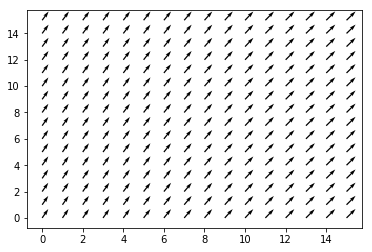

In [54]:
# Deformation from too small start level = 3
path = str(dirname) + '/ArtifactVisulization/StartLevel_3/'+ str(nframe)+'/deformation_08_0.dat.bz2'
x_deform_StartLevel3 = LoadImage(path)
path = str(dirname) + '/ArtifactVisulization/StartLevel_3/'+ str(nframe)+'/deformation_08_1.dat.bz2'
y_deform_StartLevel3 = LoadImage(path)
plt.quiver( x_deform_StartLevel3[::16,::16], y_deform_StartLevel3[::16,::16])
# plt.quiver(x_deform, y_deform)

([], <a list of 0 Text yticklabel objects>)

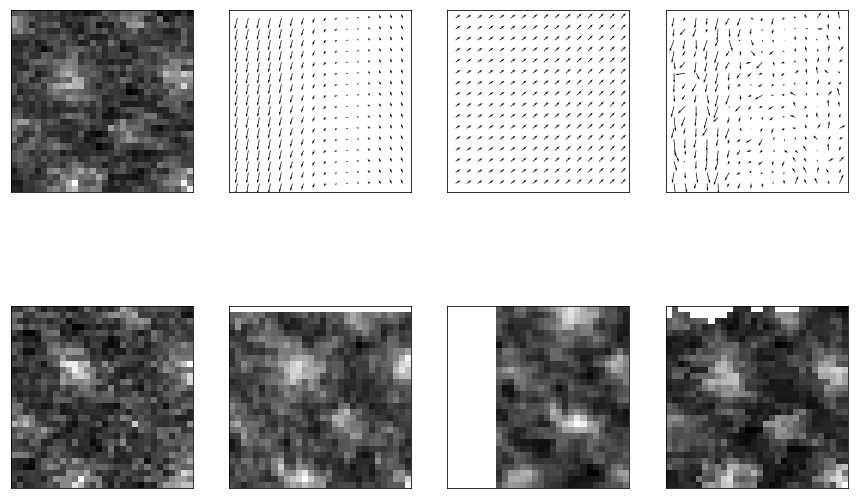

In [50]:
# Overall plot
fig = plt.figure(figsize=(15,10))

path = str(dirname) + '/ArtifactVisulization/Data/HAADF_000.dat'
img = LoadDatImage(path)
ax = fig.add_subplot(241)
plt.imshow(np.fliplr(np.transpose(img))[0:30,0:30],cmap='gray')
plt.xticks([], [])
plt.yticks([], [])

path = str(dirname) + '/ArtifactVisulization/Data/HAADF_'+ "{:0>3d}".format(nframe)+'.dat'
img = LoadDatImage(path)
ax = fig.add_subplot(245)
plt.imshow(np.fliplr(np.transpose(img))[0:30,0:30],cmap='gray')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(242)
plt.quiver(y_deform_ref[::16,::16], x_deform_ref[::16,::16])
plt.axis('scaled')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(243)
plt.quiver(y_deform_StartLevel3[::16,::16], x_deform_StartLevel3[::16,::16])
plt.axis('scaled')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(244)
plt.quiver(y_deform_lambda[::16,::16], x_deform_lambda[::16,::16])
plt.axis('scaled')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(246)
temp = LoadImage(str(dirname) + '/ArtifactVisulization/StartLevel_7/defTempl_'+"{:0>3d}".format(nframe)+'.dat.bz2')
plt.imshow(np.fliplr(np.transpose(temp))[0:30,0:30],cmap='gray')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(247)
temp = LoadImage(str(dirname) + '/ArtifactVisulization/StartLevel_3/defTempl_'+"{:0>3d}".format(nframe)+'.dat.bz2')
plt.imshow(np.fliplr(np.transpose(temp))[0:30,0:30],cmap='gray')
plt.xticks([], [])
plt.yticks([], [])

ax = fig.add_subplot(248)
temp = LoadImage(str(dirname) + '/ArtifactVisulization/Lambda_0.01/defTempl_'+"{:0>3d}".format(nframe)+'.dat.bz2')
plt.imshow(np.fliplr(np.transpose(temp))[0:30,0:30],cmap='gray')
plt.xticks([], [])
plt.yticks([], [])


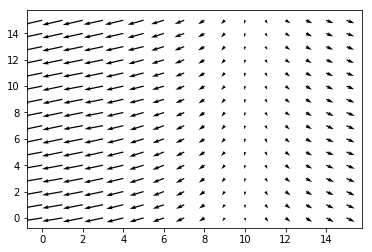

In [38]:
# Deformation from default parameter: lambda = 200, start level = 7
path = str(dirname) + '/ArtifactVisulization/StartLevel_7/'+ str(nframe)+'/deformation_08_0.dat.bz2'
x_deform_ref = LoadImage(path)
path = str(dirname) + '/ArtifactVisulization/StartLevel_7/'+ str(nframe)+'/deformation_08_1.dat.bz2'
y_deform_ref = LoadImage(path)
plt.quiver( x_deform_ref[::16,::16], y_deform_ref[::16,::16])
# plt.quiver(x_deform, y_deform)

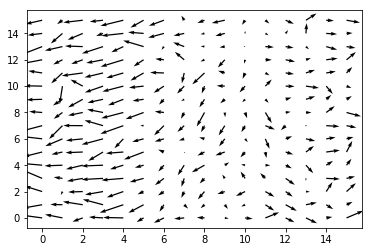

In [57]:
# Deformation from too small lambda = 0.01
path = str(dirname) + '/ArtifactVisulization/Lambda_0.01/'+ str(nframe)+'/deformation_08_0.dat.bz2'
x_deform_lambda = LoadImage(path)
path = str(dirname) + '/ArtifactVisulization/Lambda_0.01/'+ str(nframe)+'/deformation_08_1.dat.bz2'
y_deform_lambda = LoadImage(path)
plt.quiver( x_deform_lambda[::16,::16], y_deform_lambda[::16,::16])
# plt.quiver(x_deform, y_deform)

In [55]:
def LoadImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = bz2.open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()    # do not print, but read the description line
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = bz2.open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return img

In [56]:
def LoadDatImage(path):
#     path = '/srv/home/chenyu/NRR/STO_NRR/ParameterTest/Lambda/100/HAADF_NRR/stage3/average.q2bz'
    # read header in read text mode
    fid = open(path, mode='rt',encoding = "ISO-8859-1")
    next(fid)    # magic number P9, skip
#     print(fid.readline())   # description line
    fid.readline()
    size = fid.readline()   # image size in width, height
    width = int(size.split(' ')[0])
    height = int(size.split(' ')[1][:-1])
#     print(width, height)
#     print(fid.readline())   # max?
    # each number is a 8 byte double format

    # read data part in read binary mode
    img = np.zeros((height,width))
    fid = open(path, mode='rb')
    for _ in range(4):
        next(fid)
    for icol in range(width):
        for irow in range(height):
            read_bytes = fid.read(8)
            img[irow,icol] = struct.unpack('d',read_bytes)[0]

#     plt.imshow(img)
#     plt.colorbar()
    return img